In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning 
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
#!pip install xgboost

In [4]:
#!pip install catboost

# Load Dataset

In [5]:
data_wine=load_wine()
data_wine.keys()
y=data_wine['target']
X=pd.DataFrame(data_wine['data'],columns=data_wine['feature_names'])
#y=pd.DataFrame(data_wine['target'],columns=data_wine['target_names'])
data_wine['target_names'].shape
data_wine['data'].shape
data_wine['feature_names']
data_wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# Data Describtion

In [6]:
X.shape
X.describe().T
X.info() #if we have loads of rows 
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# EDA

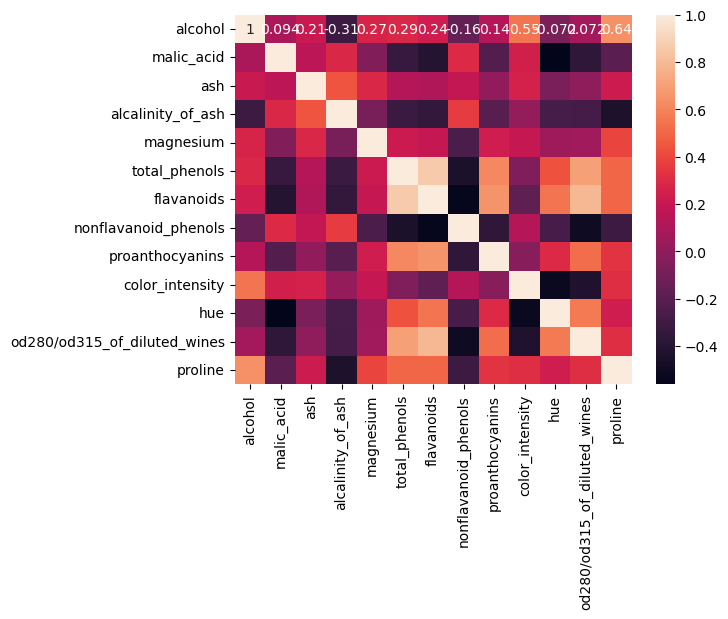

In [7]:
sns.heatmap(X.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

In [8]:
X.isna().sum().sum()

0

In [9]:
X.duplicated().sum()

0

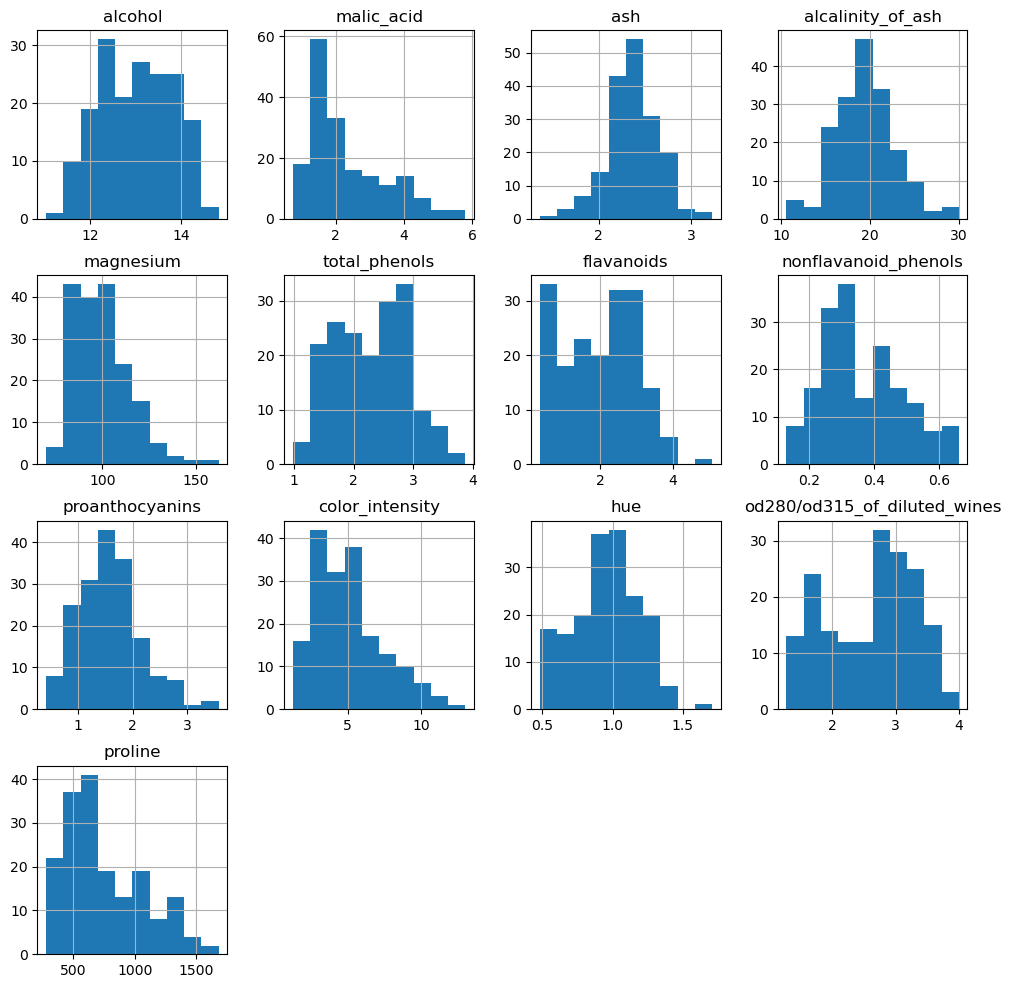

In [10]:
X.hist(figsize=(12,12))
plt.show()

## Outlier handling

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

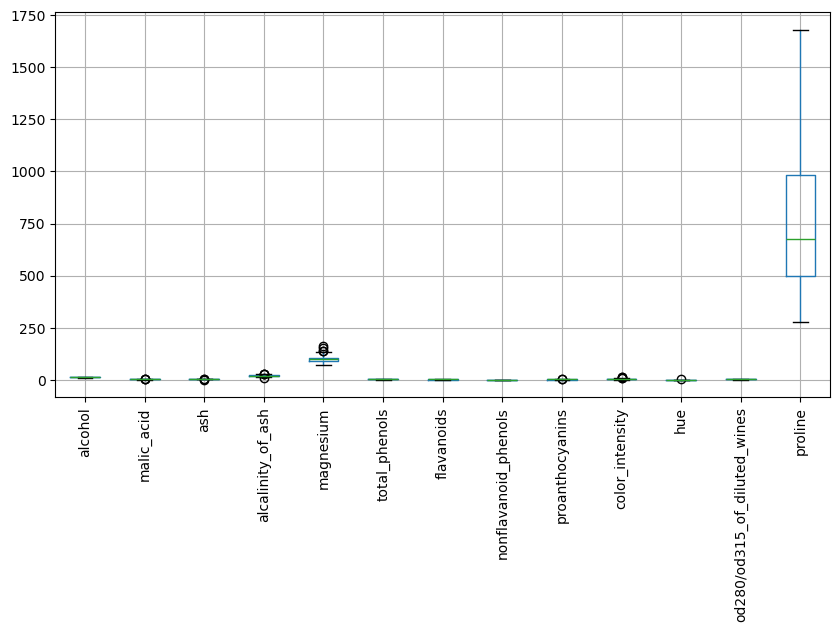

In [11]:
plt.figure(figsize=(10,5))
X.boxplot()
plt.xticks(rotation=90)

In [12]:
def handle_out(data):
    for col in data.columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        data[col]=data[col].clip(lower=lower, upper=upper)
    return data
X_=handle_out(X)

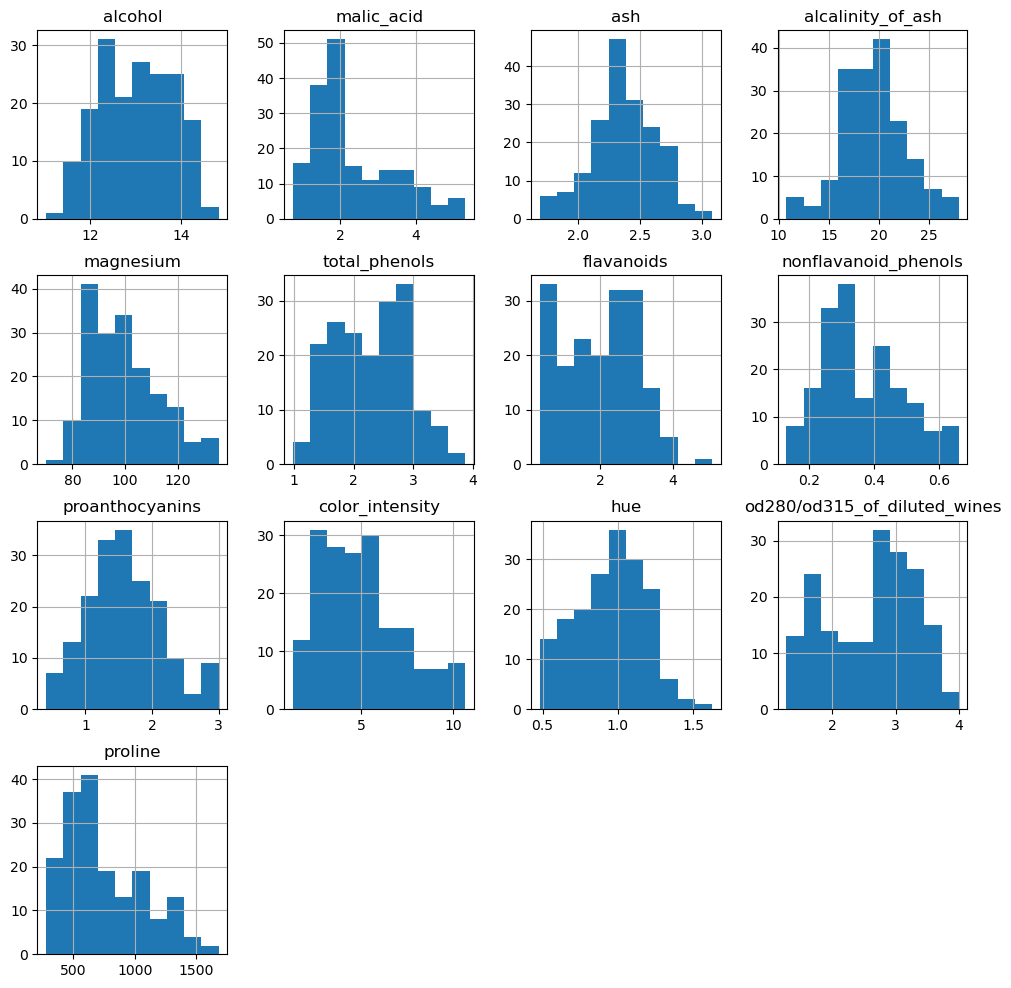

In [13]:
X_.hist(figsize=(12,12))
plt.show()

## Skewness handing

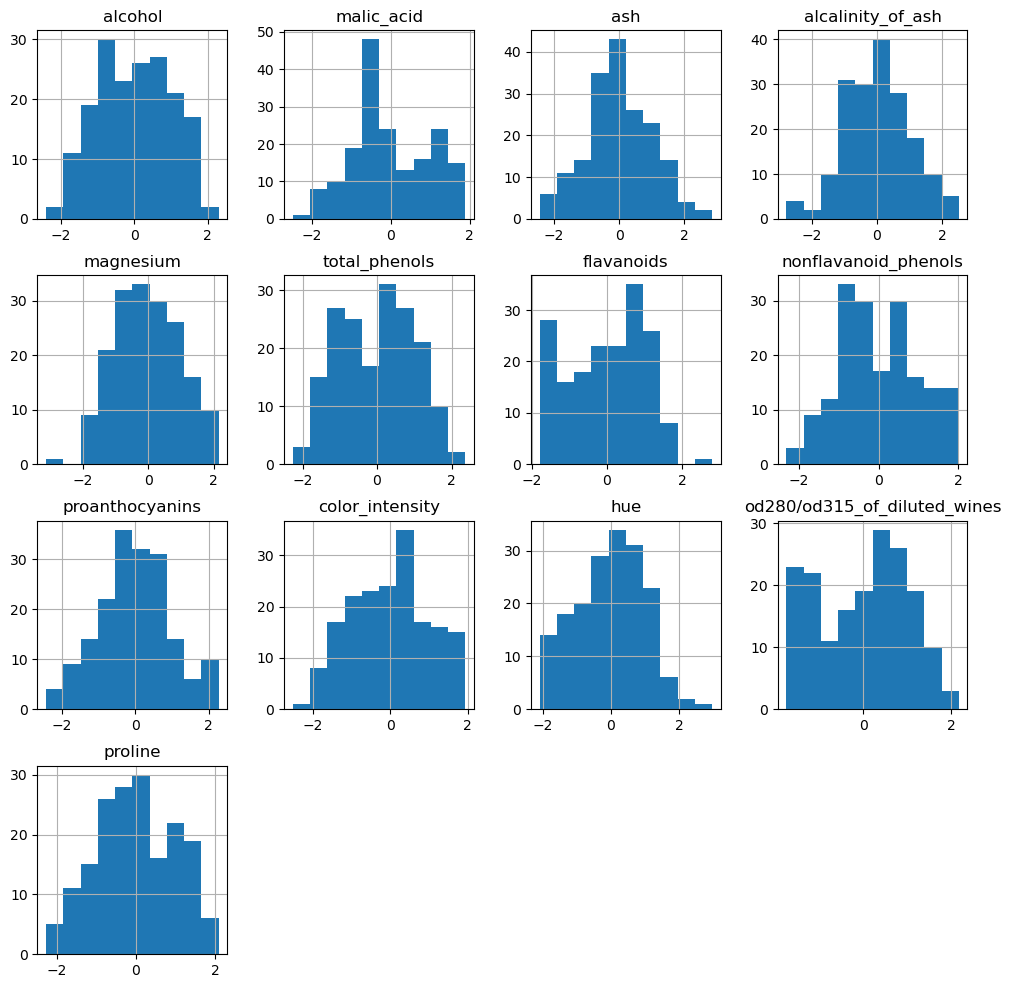

In [14]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Assuming df is your DataFrame and numeric_cols is a list of the numeric columns
# Initialize the PowerTransformer with the Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
df_yeo_johnson_transformed = X_.copy()
df_yeo_johnson_transformed = pt.fit_transform(X_)

# Check the result by plotting histograms again

plt.show()
df_yeo_johnson_transformed=pd.DataFrame(data=df_yeo_johnson_transformed,columns=X_.columns)
df_yeo_johnson_transformed
df_yeo_johnson_transformed.hist(figsize=(12,12))
plt.show()

# Preprocessing

In [15]:
#categorical to numerical 

In [16]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
y_=X_['alcohol']
X_features=X_.drop('alcohol',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_features,
                                               y_,
                                               test_size=0.2
                                               ,
                                               shuffle=True
                                               ,
                                               random_state=42)
y_
X_features.head()

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
 #scale the features
mms=MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)
X_train
X_test

array([[ 0.50084986,  0.62679856,  0.25872093,  0.70229008,  0.59310345,
         0.56751055,  0.0754717 ,  0.48062016,  0.3762598 ,  0.41875682,
         0.76556777,  0.44680851],
       [ 0.71388102,  0.54046763,  0.47383721,  0.6259542 ,  0.64482759,
         0.48734177,  0.32075472,  0.32170543,  0.39193729,  0.34023991,
         0.75457875,  0.6319937 ],
       [ 0.43512748,  0.72751799,  0.59593023,  0.39694656,  0.19310345,
         0.03375527,  0.75471698,  0.12790698,  0.32026876,  0.25299891,
         0.38095238,  0.2537431 ],
       [ 0.13824363,  0.72751799,  0.68313953,  0.47328244,  0.69655172,
         0.61392405,  0.30188679,  0.75968992,  0.44344905,  0.61941112,
         0.52747253,  0.79353822],
       [ 0.06345609,  0.16636691,  0.51453488,  0.1221374 ,  0.38965517,
         0.35021097,  0.26415094,  0.24031008,  0.32922732,  0.55834242,
         0.80952381,  0.18282112],
       [ 0.23342776,  0.74190647,  0.5377907 ,  0.76335878,  0.62758621,
         0.5907173 ,  

# polynomial

In [19]:
poly=PolynomialFeatures(degree=2)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [20]:
#pPolynomialFeatures for make feature more ccomple
# for deg in range(6):
#     try:
#         poly=PolynomialFeatures(degree=deg)
#         X_train=poly.fit_transform(X_train)
#         X_test=poly.transform(X_test)
#         KNN=KNeighborsRegressor(n_neighbors=7)
#         KNN.fit(X_train,y_train)
#         y_alcohol=KNN.predict(X_test)
#         r2=r2_score(y_test,y_alcohol)
#         print(f'R2{deg} ={r2}')
#     except ValueError:
#         print("there was an error")
        

In [21]:
#train model:KNN regresion 
KNN=KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [22]:
y_alcohol=KNN.predict(X_test)
y_alcohol
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
#evaluate
r2=r2_score(y_test,y_alcohol)
mse=mean_squared_error(y_test,y_alcohol)
mae=mean_absolute_error(y_test,y_alcohol)

In [24]:
print(f'R2 ={r2}')
print(f'mse={mse}')
print(f'mae={mae}')

R2 =0.6936055471156726
mse=0.1829284580498863
mae=0.30682539682539645


## KNN Hyperparameter

In [25]:
#hyperparameter:#if k is even it will calculate average between numbers
for i in range(2,20):
    knn_reg=KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train,y_train)
    y_pred=knn_reg.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(f"n_neighbours : {i} ,r2:{r2}")

n_neighbours : 2 ,r2:0.6407018004586444
n_neighbours : 3 ,r2:0.6955028856552643
n_neighbours : 4 ,r2:0.7167796175136838
n_neighbours : 5 ,r2:0.7477486099020055
n_neighbours : 6 ,r2:0.7314580365137233
n_neighbours : 7 ,r2:0.6936055471156726
n_neighbours : 8 ,r2:0.6646345616409461
n_neighbours : 9 ,r2:0.6425970231075288
n_neighbours : 10 ,r2:0.6706412854451722
n_neighbours : 11 ,r2:0.6888401016079861
n_neighbours : 12 ,r2:0.699037774581833
n_neighbours : 13 ,r2:0.7036690816175868
n_neighbours : 14 ,r2:0.6988387895672205
n_neighbours : 15 ,r2:0.6926535621454963
n_neighbours : 16 ,r2:0.7006633950597501
n_neighbours : 17 ,r2:0.7018372913999763
n_neighbours : 18 ,r2:0.7069757892845566
n_neighbours : 19 ,r2:0.7072454603264713


In [36]:
# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_neighbors': randint(3, 21),  # Randomly choose between 3 to 15 neighbors
    'weights': ['uniform', 'distance'],  # Weight function to use
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute the nearest neighbors
    'leaf_size': randint(20, 101),  # Randomly choose leaf size between 20 and 50
    'p': randint(1, 3),  # p=1 (Manhattan), p=2 (Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan']
}
# Initialize the RandomizedSearchCV with KNN regressor
random_search = RandomizedSearchCV(estimator=KNN,
                                   param_distributions=param_dist, 
                                   n_iter=150, 
                                   cv=5,
                                   scoring='neg_mean_squared_error', 
                                   verbose=2, 
                                   n_jobs=-1,
                                   random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MSE):", random_search.best_score_)
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calculate the mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("Test Set Mean Squared Error:", mse)
print("Test Set r2 Squared Error:", r2)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 49, 'metric': 'manhattan', 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}
Best Score (Negative MSE): -0.30950648765743766
Test Set Mean Squared Error: 0.17147730070791023
Test Set r2 Squared Error: 0.712785564954834


# Linier Regression

In [27]:
#train model:Linier Regression
LR=LinearRegression()
LR.fit(X_train,y_train)
y_alcohol_linierReression=LR.predict(X_test)
y_alcohol_linierReression

array([11.453125, 13.28125 , 12.453125, 14.46875 , 14.453125, 13.375   ,
       13.96875 , 12.9375  , 12.59375 , 11.      , 13.1875  , 12.34375 ,
       13.9375  , 12.671875, 14.765625,  9.71875 , 13.90625 , 12.390625,
       15.125   , 13.453125, 16.6875  , 11.15625 , 13.390625, 12.265625,
       15.375   , 14.21875 , 11.625   , 13.953125, 12.6875  , 12.703125,
       14.      , 11.765625, 11.296875, 14.78125 , 14.046875, 11.625   ])

In [28]:
r2=r2_score(y_test,y_pred)
m=mean_squared_error(y_test,y_pred)
print(r2,m)

0.712785564954834 0.17147730070791023


# DescisionTree

In [29]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_tree=dt.predict(X_test)
r2=r2_score(y_test,y_tree)
m=mean_squared_error(y_test,y_tree)
print(r2,m)

0.21454086960477603 0.46894722222222224


## RandomForest

In [37]:
rfr=RandomForestRegressor(n_estimators=100,random_state=42)


In [38]:
# Define the hyperparameter grid
param_distributions = {
    'n_estimators': randint(200, 1000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': randint(10, 100),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

In [39]:
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative mean squared error as the scoring metric
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002516467B790>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025163FCC410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025164075190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000251657FC810>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator
best_rfr = random_search.best_estimator_

# Predict on the test set using the best model
y_random = best_rfr.predict(X_test)

# Calculate the Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_random)
print("Test Set Mean Squared Error:", mse)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 14, 'n_estimators': 944}
Test Set Mean Squared Error: 0.1412737516877212


In [41]:
r2 = r2_score(y_test, y_random)
print("Test Set Mean Squared Error:", r2)

Test Set Mean Squared Error: 0.7633747405039006


# XGboost

In [42]:
xgbr=XGBRegressor()
xgbr.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_xgbr=xgbr.predict(X_test)
r2=r2_score(y_test,y_xgbr)
print(r2)

0.6872809994969277


## Catboost

In [46]:
cbr=CatBoostRegressor(verbose=0)
cbr.fit(X_train,y_train)
y_reg=cbr.predict(X_test)

In [47]:
r2=r2_score(y_test,y_reg)
r2

0.7101748139801533

In [49]:
models=['KNN','Linier Regression','DescisionTree','RandomForest','XGBoost','Catboost']
iter=0
r2=[0.712785564954834,0.712785564954834,0.21454086960477603,0.7633747405039006,0.6872809994969277,0.7101748139801533]
for model in models:
    print(f'I have reache r2 score {r2[iter]} for model = {model}')
    iter+=1
print("as you can see best score belongs to RandomForest :0.7633747405039006")

I have reache r2 score 0.712785564954834 for model = KNN
I have reache r2 score 0.712785564954834 for model = Linier Regression
I have reache r2 score 0.21454086960477603 for model = DescisionTree
I have reache r2 score 0.7633747405039006 for model = RandomForest
I have reache r2 score 0.6872809994969277 for model = XGBoost
I have reache r2 score 0.7101748139801533 for model = Catboost
as you can see best score belongs to RandomForest :0.7633747405039006
